<a href="http://cocl.us/pytorch_link_top">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/Pytochtop.png" width="750" alt="IBM Product " />
</a> 


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/cc-logo-square.png" width="200" alt="cognitiveclass.ai logo" />


<h1>Prebuilt Datasets and Transforms</h1> 


<h2>Objective</h2><ul><li> How to use MNIST prebuilt dataset in pytorch.</li></ul> 


<h2>Table of Contents</h2>
<p>In this lab, you will use a prebuilt dataset and then use some prebuilt dataset transforms.</p>
<ul>
    <li><a href="#Prebuilt_Dataset">Prebuilt Datasets</a></li>
    <li><a href="#Torchvision">Torchvision Transforms</a></li>
</ul>
<p>Estimated Time Needed: <strong>10 min</strong></p>

<hr>


<h2>Preparation</h2>


The following are the libraries we are going to use for this lab. The <code>torch.manual_seed()</code> is for forcing the random function to give the same number every time we try to recompile it.


In [1]:
# These are the libraries will be used for this lab.

import torch 
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(0)

This is the function for displaying images.


In [2]:
# Show data by diagram

def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('y = ' + str(data_sample[1].item()))

<!--Empty Space for separating topics-->


<h2 id="Prebuilt_Dataset">Prebuilt Datasets</h2> 


You will focus on the following libraries: 


In [3]:
# Run the command below when you do not have torchvision installed
# !conda install -y torchvision

import torchvision.transforms as transforms
import torchvision.datasets as dsets

We can import a prebuilt dataset. In this case, use MNIST. You'll work with several of these parameters later by placing a transform object in the argument <code>transform</code>.


In [4]:
# Import the prebuilt dataset into variable dataset

dataset = dsets.MNIST(
    root = './data', 
    train = False, 
    download = True, 
    transform = transforms.ToTensor()
)

Processing...
Done!


Each element of the dataset object contains a tuple. Let us see whether the first element in the dataset is a tuple and what is in it.


In [5]:
# Examine whether the elements in dataset MNIST are tuples, and what is in the tuple?

print("Type of the first element: ", type(dataset[0]))
print("The length of the tuple: ", len(dataset[0]))
print("The shape of the first element in the tuple: ", dataset[0][0].shape)
print("The type of the first element in the tuple", type(dataset[0][0]))
print("The second element in the tuple: ", dataset[0][1])
print("The type of the second element in the tuple: ", type(dataset[0][1]))
print("As the result, the structure of the first element in the dataset is (tensor([1, 28, 28]), tensor(7)).")

Type of the first element:  <class 'tuple'>
The length of the tuple:  2
The shape of the first element in the tuple:  torch.Size([1, 28, 28])
The type of the first element in the tuple <class 'torch.Tensor'>
The second element in the tuple:  tensor(7)
The type of the second element in the tuple:  <class 'torch.Tensor'>
As the result, the structure of the first element in the dataset is (tensor([1, 28, 28]), tensor(7)).


As shown in the output, the first element in the tuple is a cuboid tensor. As you can see, there is a dimension with only size 1, so basically, it is a rectangular tensor.<br>
The second element in the tuple is a number tensor, which indicate the real number the image shows. As the second element in the tuple is <code>tensor(7)</code>, the image should show a hand-written 7.


<!--Empty Space for separating topics-->


Let us plot the first element in the dataset:


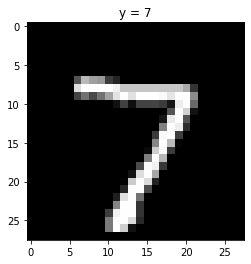

In [6]:
# Plot the first element in the dataset

show_data(dataset[0])

As we can see, it is a 7.


Plot the second sample:   


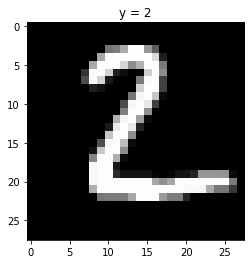

In [7]:
# Plot the second element in the dataset

show_data(dataset[1])

<!--Empty Space for separating topics-->


<h2 id="Torchvision"> Torchvision Transforms  </h2> 


We can apply some image transform functions on the MNIST dataset.


As an example, the images in the MNIST dataset can be cropped and converted to a tensor. We can use <code>transform.Compose</code> we learned from the previous lab to combine the two transform functions.


In [8]:
# Combine two transforms: crop and convert to tensor. Apply the compose to MNIST dataset

croptensor_data_transform = transforms.Compose([transforms.CenterCrop(20), transforms.ToTensor()])
dataset = dsets.MNIST(root = './data', train = False, download = True, transform = croptensor_data_transform)
print("The shape of the first element in the first tuple: ", dataset[0][0].shape)

The shape of the first element in the first tuple:  torch.Size([1, 20, 20])


We can see the image is now 20 x 20 instead of 28 x 28.


<!--Empty Space for separating topics-->


Let us plot the first image again. Notice that the black space around the <b>7</b> become less apparent.


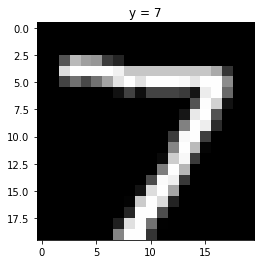

In [9]:
# Plot the first element in the dataset

show_data(dataset[0],shape = (20, 20))

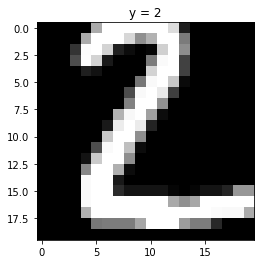

In [10]:
# Plot the second element in the dataset

show_data(dataset[1],shape = (20, 20))

In the below example, we horizontally flip the image, and then convert it to a tensor. Use <code>transforms.Compose()</code> to combine these two transform functions. Plot the flipped image.


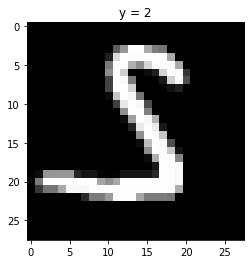

In [11]:
# Construct the compose. Apply it on MNIST dataset. Plot the image out.

fliptensor_data_transform = transforms.Compose([transforms.RandomHorizontalFlip(p = 1),transforms.ToTensor()])
dataset = dsets.MNIST(root = './data', train = False, download = True, transform = fliptensor_data_transform)
show_data(dataset[1])

<!--Empty Space for separating topics-->


<h3>Practice</h3>


Try to use the <code>RandomVerticalFlip</code> (vertically flip the image) with horizontally flip and convert to tensor as a compose. Apply the compose on image. Use <code>show_data()</code> to plot the second image (the image as <b>2</b>).


In [ ]:
# Practice: Combine vertical flip, horizontal flip and convert to tensor as a compose. Apply the compose on image. Then plot the image

# Type your code here
randomverticalflip_data_transform = transforms.Compose([transforms.RandomVerticalFlip(), transforms.ToTensor()])
dataset = dsets.MNIST(root = './data', train = False, download = True, transform = croptensor_data_transform)

Double-click **here** for the solution.

<!-- 
my_data_transform = transforms.Compose([transforms.RandomVerticalFlip(p = 1), transforms.RandomHorizontalFlip(p = 1), transforms.ToTensor()])
dataset = dsets.MNIST(root = './data', train = False, download = True, transform = my_data_transform)
show_data(dataset[1])
 -->


<!--Empty Space for separating topics-->


<a href="http://cocl.us/pytorch_link_bottom">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/notebook_bottom%20.png" width="750" alt="PyTorch Bottom" />
</a>


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/">Michelle Carey</a>, <a href="www.linkedin.com/in/jiahui-mavis-zhou-a4537814a">Mavis Zhou</a> 


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                                          |
| ----------------- | ------- | ---------- | ----------------------------------------------------------- |
| 2020-09-21        | 2.0     | Shubham    | Migrated Lab to Markdown and added to course repo in GitLab |


<hr>


Copyright © 2018 <a href="cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu">cognitiveclass.ai</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.
